In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from project_utils import *

%load_ext autoreload
%autoreload 2

## Build graph

In [2]:
actors_agg_df = pd.read_pickle("actors_agg_df.pkl")

In [3]:
nodes_df = actors_agg_df[["cast", "crew", "production_companies", "genres", "movie_id"]]
nodes_df.head()

,cast,crew,production_companies,genres,movie_id
actor_id,,,,,
0,"{Anthony Geary, Trinidad Silva, Fran Drescher,...",{Jay Levey},"{Orion Pictures, Cinecorp}",{Comedy},{3619}
1,"{Joseph Pierre, Ashley Walters, Tory Kittles, ...",{Jim Sheridan},"{Paramount Pictures, Cent Productions Inc., MT...",{Drama},{1233}
2,"{Emma Catherwood, James Denton, Michael Welch,...",{Brad J. Silverman},"{Coram Deo Studios, Birchwood Pictures}","{Music, Drama}",{4203}
3,"{Navtej Singh Johar, Soha Ali Khan, Arif Zakar...","{Rakeysh Omprakash Mehra, Deepa Mehta}","{Flicks Motion Pictures, Cracking the Earth Fi...",{Drama},"{1023, 3543}"
4,"{Greg Kinnear, Jake Abel, Tatiana Maslany, Ala...",{Marc Abraham},"{Spyglass Entertainment, Universal Pictures, I...",{Drama},{2242}


## Get translations of ids to names

In [4]:
dict_id_actor = dict(zip(actors_agg_df.index, actors_agg_df["actors"]))
dict_actor_id = dict(zip(actors_agg_df["actors"], actors_agg_df.index))

## Get cast intersecctions length mat

## Get cast intersections

In [5]:
col = "cast"
cast_col = nodes_df[col]
cast_adj_raw = get_intersections_length_adj_mat(cast_col)
cast_adj_diag = np.diag(np.diag(cast_adj_raw))
cast_adj = cast_adj_raw - cast_adj_diag

Time:  3.6455237000000005


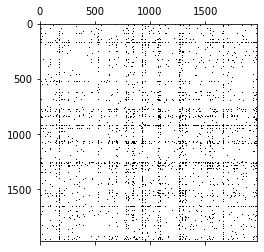

In [6]:
plt.spy(cast_adj)

In [7]:
np.save("cast_adj", cast_adj)

### Print most connected actors

In [8]:
actor_id_col = "actor_id"
cast_node_degree = cast_adj.sum(axis=1)
most_connected_actors_id = np.argsort(-cast_node_degree)[:20]
most_connected_actors = [dict_id_actor.get(id_) for id_ in most_connected_actors_id]
actors_agg_df[actors_agg_df.index.isin(most_connected_actors_id)]
print(most_connected_actors)

['Bruce Willis', 'Johnny Depp', 'Denzel Washington', 'Ben Stiller', 'Tom Hanks', 'Nicolas Cage', 'Tom Cruise', 'Ben Affleck', 'Robert De Niro', 'George Clooney', 'Mark Wahlberg', 'Matt Damon', 'Leonardo DiCaprio', 'Christian Bale', 'Harrison Ford', 'Will Ferrell', 'Will Smith', 'Adam Sandler', 'John Travolta', 'Kevin Costner']


## Get cast unions length mat

In [9]:
col = "cast"
cast_col = nodes_df[col]
cast_adj_union_raw = get_unions_length_adj_mat(cast_col)
cast_adj_union_diag = np.diag(np.diag(cast_adj_union_raw))
cast_adj_union = cast_adj_union_raw - cast_adj_union_diag

Time:  12.974935899999998


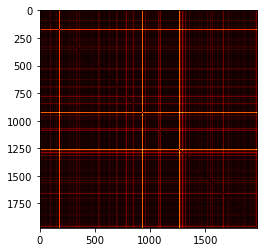

In [10]:
plt.imshow(cast_adj_union, cmap="hot", interpolation="none")

In [11]:
np.save("cast_adj_union", cast_adj_union)

## Get movies intersections length mat

In [12]:
col = "movie_id"
movie_col = nodes_df[col]
movie_adj_raw = get_intersections_length_adj_mat(movie_col)
movie_adj_diag = np.diag(np.diag(movie_adj_raw))
movie_adj = movie_adj_raw - movie_adj_diag

Time:  1.7132767000000015


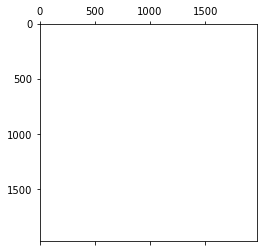

In [13]:
plt.spy(movie_adj)

In [14]:
np.save("movie_adj", movie_adj)

## Get movies union length mat

In [15]:
col = "movie_id"
movie_col = nodes_df[col]
movie_adj_union_raw = get_unions_length_adj_mat(movie_col)
movie_adj_union_diag = np.diag(np.diag(movie_adj_union_raw))
movie_adj_union = movie_adj_union_raw - movie_adj_union_diag

Time:  2.0692828


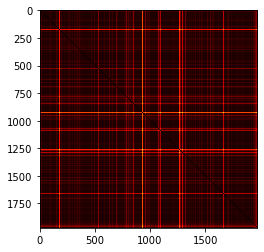

In [16]:
plt.imshow(movie_adj_union, cmap="hot", interpolation="none")

In [17]:
np.save("movie_adj_union", movie_adj_union)

## Get directors intersections length mat

In [18]:
col = "crew"
crew_col = nodes_df[col]
crew_adj_raw = get_intersections_length_adj_mat(crew_col)
crew_adj_diag = np.diag(np.diag(crew_adj_raw))
crew_adj = crew_adj_raw - crew_adj_diag

Time:  1.6751954999999974


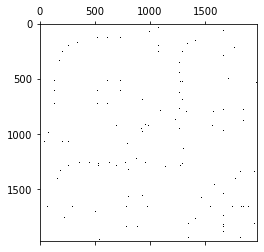

In [19]:
plt.spy(crew_adj)

In [20]:
np.save("crew_adj", crew_adj)

## Get directors union length mat

In [21]:
col = "crew"
crew_col = nodes_df[col]
crew_adj_union_raw = get_unions_length_adj_mat(crew_col)
crew_adj_union_diag = np.diag(np.diag(crew_adj_union_raw))
crew_adj_union = crew_adj_union_raw - crew_adj_union_diag

Time:  2.1298711000000026


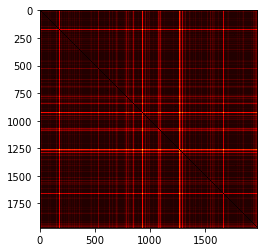

In [22]:
plt.imshow(crew_adj_union, cmap="hot", interpolation="none")

In [23]:
np.save("crew_adj_union", crew_adj_union)

## Get production companies intersections length mat

In [24]:
col = "production_companies"
prod_comp_col = nodes_df[col]
prod_comp_adj_raw = get_intersections_length_adj_mat(prod_comp_col)
prod_comp_adj_diag = np.diag(np.diag(prod_comp_adj_raw))
prod_comp_adj = prod_comp_adj_raw - prod_comp_adj_diag

Time:  1.8553912000000032


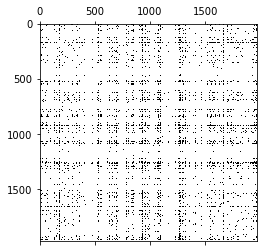

In [25]:
plt.spy(prod_comp_adj)

In [26]:
np.save("prod_comp_adj", prod_comp_adj)

## Get production companies unions length mat

In [27]:
col = "production_companies"
prod_comp_col = nodes_df[col]
prod_comp_adj_union_raw = get_unions_length_adj_mat(prod_comp_col)
prod_comp_adj_union_diag = np.diag(np.diag(prod_comp_adj_union_raw))
prod_comp_adj_union = prod_comp_adj_union_raw - prod_comp_adj_union_diag

Time:  2.9501987000000014


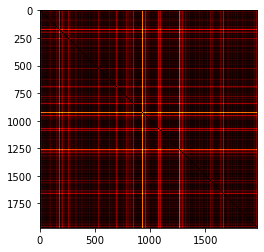

In [28]:
plt.imshow(prod_comp_adj_union, cmap="hot", interpolation="none")

In [29]:
np.save("prod_comp_adj_union", prod_comp_adj_union)

## Get genres intersections length mat

In [30]:
col = "genres"
genres_col = nodes_df[col]
genres_adj_raw = get_intersections_length_adj_mat(genres_col)
genres_adj_diag = np.diag(np.diag(genres_adj_raw))
genres_adj = genres_adj_raw - genres_adj_diag

Time:  2.0521242000000015


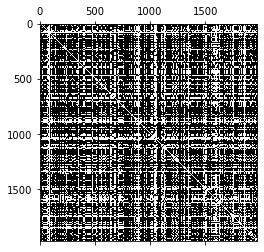

In [31]:
plt.spy(genres_adj)

In [32]:
np.save("genres_adj", genres_adj)

## Get genres unions length mat

In [33]:
col = "genres"
genres_col = nodes_df[col]
genres_adj_union_raw = get_unions_length_adj_mat(genres_col)
genres_adj_union_diag = np.diag(np.diag(genres_adj_union_raw))
genres_adj_union = genres_adj_union_raw - genres_adj_union_diag

Time:  2.439864


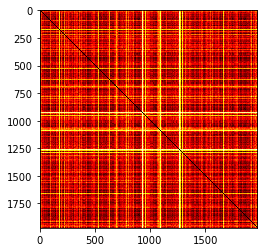

In [34]:
plt.imshow(genres_adj_union, cmap="hot", interpolation="none")

In [35]:
np.save("genres_adj_union", genres_adj_union)

## Aggregated adjacency matrix

In [36]:
agg_adj = np.divide(
    (
        0.3 * cast_adj
        + 0.3 * movie_adj
        + 0.2 * crew_adj
        + 0.1 * genres_adj
        + 0.1 * prod_comp_adj
    ),
    (
        0.3 * cast_adj_union
        + 0.3 * movie_adj_union
        + 0.2 * crew_adj_union
        + 0.1 * genres_adj_union
        + 0.1 * prod_comp_adj_union
    ),
)
agg_adj = np.where(np.isnan(agg_adj), 0, agg_adj)
np.sum(agg_adj)

C:\Users\AndresMontero\.conda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


21352.801381026355

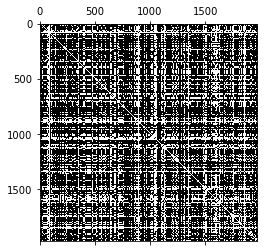

In [37]:
plt.spy(agg_adj)

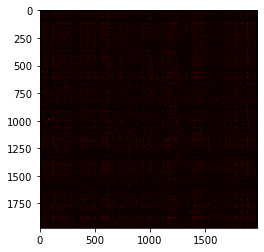

In [38]:
plt.imshow(agg_adj, cmap="hot", interpolation="none")

In [39]:
np.min(agg_adj)

0.0

In [40]:
np.max(agg_adj)

0.48192771084337355

In [41]:
np.save("agg_adj", agg_adj)

## Sparsify graph

In [42]:
percentile = 70
eps = np.percentile(agg_adj, 70)
print(eps)

0.0072992700729927005


In [43]:
sparse_agg_adj = sparsify_mat(agg_adj, eps)

In [44]:
np.save("sparse_agg_actor_adj", sparse_agg_adj)

## Tests

### Test consistency of data

In [45]:
# Test if actor belongs to movie
movie_id_col = "movie_id"
title_col = "title"
actors_col = "actors"
actor = "Sam Worthington"
movies_idx_df = pd.read_csv("movies_idx.csv")
dict_id_movie = dict(zip(movies_idx_df.index, movies_idx_df[title_col]))
actor_id = dict_actor_id.get(actor)
test_movie_id = actors_agg_df[actors_agg_df[actors_col] == actor].loc[
    actor_id, movie_id_col
]
[dict_id_movie.get(movie_id) for movie_id in list(test_movie_id)]

['Avatar', 'Man on a Ledge', 'Wrath of the Titans', 'Clash of the Titans']

In [46]:
# Test number of actors
len(np.unique(actors_agg_df.index.values))

1971